# Credit score classification
## 1st milestone

Authors: Zuzanna Piróg, Adrian Zaręba

In [103]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)



## Pobranie zbioru danych

In [104]:
df_original_dataset = pd.read_csv("train.csv")
dataset = df_original_dataset.copy()

In [105]:
#jak wygląda nasz zbiór
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Opisy kolumn
ID: Unique ID of the record <br>
Customer_ID: Unique ID of the customer <br>
Month: Month of the year <br>
Name: The name of the person <br>
Age: The age of the person <br>
SSN: Social Security Number of the person <br>
Occupation: The occupation of the person <br>
Annual_Income: The Annual Income of the person <br>
Monthly_Inhand_Salary: Monthly in-hand salary of the person <br>
Num_Bank_Accounts: The number of bank accounts of the person <br>
Num_Credit_Card: Number of credit cards the person is having <br>
Interest_Rate: The interest rate on the credit card of the person <br>
Num_of_Loan: The number of loans taken by the person from the bank <br>
Type_of_Loan: The types of loans taken by the person from the bank <br>
Delay_from_due_date: The average number of days delayed by the person from the date of payment <br>
Num_of_Delayed_Payment: Number of payments delayed by the person <br>
Changed_Credit_Card: The percentage change in the credit card limit of the person <br>
Num_Credit_Inquiries: The number of credit card inquiries by the person <br>
Credit_Mix: Classification of Credit Mix of the customer <br>
Outstanding_Debt: The outstanding balance of the person <br>
Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer <br>
Credit_History_Age: The age of the credit history of the person <br>
Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no. <br>
Total_EMI_per_month: The total EMI per month of the person <br>
Amount_invested_monthly: The monthly amount invested by the person <br>
Payment_Behaviour: The payment behaviour of the person <br>
Monthly_Balance: The monthly balance left in the account of the person <br>
Credit_Score: The credit score of the person <br>

## Eksploracyjna analiza danych

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [107]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [108]:
dataset.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [109]:
dataset.isna().sum()
# przy sprawdzeniu mamy informację że credit score nie ma wartóści NA

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Podział danych

In [110]:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(dataset, groups=dataset['Customer_ID'])
train_inds, test_inds = next(split)

train1 = dataset.iloc[train_inds]
main_validate = dataset.iloc[test_inds]

In [111]:
splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(train, groups=train1['Customer_ID'])
train_inds, test_inds = next(split)

train = train1.iloc[train_inds]
main_validate = train1.iloc[test_inds]

In [112]:
dataset = train

## Zmiana typu danych w kolumnach

In [113]:
#przypomnijmy jakie kolumny są typu object
dataset.select_dtypes('O').info()
#niektóre z nich powinny być zamienione na integer lub float, chociażby w przypadku age lub monthly_balance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       49000 non-null  object
 1   Customer_ID              49000 non-null  object
 2   Month                    49000 non-null  object
 3   Name                     44071 non-null  object
 4   Age                      49000 non-null  object
 5   SSN                      49000 non-null  object
 6   Occupation               49000 non-null  object
 7   Annual_Income            49000 non-null  object
 8   Num_of_Loan              49000 non-null  object
 9   Type_of_Loan             43624 non-null  object
 10  Num_of_Delayed_Payment   45506 non-null  object
 11  Changed_Credit_Limit     49000 non-null  object
 12  Credit_Mix               49000 non-null  object
 13  Outstanding_Debt         49000 non-null  object
 14  Credit_History_Age       44535 non-nul

In [114]:
#sprawdźmy czy poza wartościami Nan występują jakieś dziwne wartości w tych kolumnach
kolumny_object = dataset.select_dtypes('O').columns
kolumny_object

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [115]:
for kolumna in kolumny_object:
    print("Nazwa kolumny:" + kolumna)
    print("--"*15)
    print(dataset[kolumna].value_counts(dropna = False))
    print("--"*15, '\n')

Nazwa kolumny:ID
------------------------------
0x1602     1
0x19c5c    1
0x19c4f    1
0x19c50    1
0x19c51    1
          ..
0xd9bd     1
0xd9ce     1
0xd9cf     1
0xd9d0     1
0x25fed    1
Name: ID, Length: 49000, dtype: int64
------------------------------ 

Nazwa kolumny:Customer_ID
------------------------------
CUS_0xd40     8
CUS_0xaa15    8
CUS_0x7eb0    8
CUS_0x8873    8
CUS_0x9dfd    8
             ..
CUS_0xc70     8
CUS_0x1f33    8
CUS_0x932c    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 6125, dtype: int64
------------------------------ 

Nazwa kolumny:Month
------------------------------
January     6125
February    6125
March       6125
April       6125
May         6125
June        6125
July        6125
August      6125
Name: Month, dtype: int64
------------------------------ 

Nazwa kolumny:Name
------------------------------
NaN                  4929
Alexei Oreskovics      32
Danielz                31
Michaelr               30
Nickq                  30


Jak możemy zaobserwować jakość naszych danych nie jest idealna.
Zastanawiające wydają się być kolumna Age i jej skrajne wartości, wartości: #F%$D@*&8 w kolumnie security number oraz chociażby !@9#%8 w kolumnie Payment_Behaviour


In [116]:
#Zatem pozbądźmy się ich
dataset = dataset.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ , " ')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [117]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [118]:
dataset.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        4929
Age                            0
SSN                         2777
Occupation                  3469
Annual_Income                  0
Monthly_Inhand_Salary       7333
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5376
Delay_from_due_date            0
Num_of_Delayed_Payment      3494
Changed_Credit_Limit        1015
Num_Credit_Inquiries         979
Credit_Mix                  9951
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4465
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2175
Payment_Behaviour           3823
Monthly_Balance              576
Credit_Score                   0
dtype: int64

Jak możemy zauważyć liczba brakujących informacji się zwiększyła ale usunęliśmy mylące informacje

In [119]:
#Teraz zmieńmy typy danych do najlepszego typu dla danej kolumny

#zmiania z hex(szesnastkowy) na system dziesiętny
dataset['ID'] = dataset.ID.apply(lambda x: int(x, 16))
#zmiania z hex(szesnastkowy) na system dziesiętny ale pierwsze cztery znaki w kolumnie nie są liczbowe
dataset['Customer_ID'] = dataset.Customer_ID.apply(lambda x: int(x[4:], 16))
#zmiana formatu czasu
dataset['Month'] = pd.to_datetime(dataset.Month, format='%B').dt.month
#zmiana na int 
dataset['Age'] = dataset.Age.astype(int)  
dataset['Num_of_Loan'] = dataset.Num_of_Loan.astype(int) 
#zmiana na float
dataset['SSN'] = dataset.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
dataset['Annual_Income'] = dataset.Annual_Income.astype(float)
dataset['Num_of_Delayed_Payment'] = dataset.Num_of_Delayed_Payment.astype(float)
dataset['Changed_Credit_Limit'] = dataset.Changed_Credit_Limit.astype(float)
dataset['Outstanding_Debt'] = dataset.Outstanding_Debt.astype(float)
dataset['Amount_invested_monthly'] = dataset.Amount_invested_monthly.astype(float)
dataset['Monthly_Balance'] = dataset.Monthly_Balance.astype(float)

In [120]:
#Zmiana zapisu 22 Years and 1 Months

def Zmiana_miesiecy(x):
    #funkcja zwraca wynik w liczbie miesiecy
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [121]:
dataset['Credit_History_Age'] = dataset.Credit_History_Age.apply(lambda x: Zmiana_miesiecy(x)).astype(float)
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [122]:
dataset.groupby('Customer_ID')['Credit_History_Age'].apply(list)
#dla danego customer mamy wiele wpisów

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1013     [311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317...
1015        [nan, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, nan]
1019     [388.0, 389.0, 390.0, 391.0, 392.0, 393.0, 394...
                               ...                        
50965     [16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
50970    [241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 6125, dtype: object

In [123]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
1019         Home Equity Loan                                                                                                       8
                                                                                                                                   ..
50965        Home Equity Loan, Student Loan, Payday Loan, Not Speci

In [124]:
dataset.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1013     [Home Equity Loan, Mortgage Loan, Not Specifie...
1015     [Personal Loan, Mortgage Loan, Not Specified, ...
1019     [Home Equity Loan, Home Equity Loan, Home Equi...
                               ...                        
50965    [Home Equity Loan, Student Loan, Payday Loan, ...
50970    [Auto Loan, Payday Loan, Student Loan, and Pay...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996             [nan, nan, nan, nan, nan, nan, nan, nan]
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 6125, dtype: object

In [125]:
#nietkóre dane znajdujące się w kolumnie są wymienione po przecinku albo po słowie and
#zobaczmy z jakimi kategoriami mamy doczynienia

def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [126]:
get_Diff_Values_Colum(dataset['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [127]:
#podsumujmy zmienione typy kolumn:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49000 non-null  int64  
 1   Customer_ID               49000 non-null  int64  
 2   Month                     49000 non-null  int64  
 3   Name                      44071 non-null  object 
 4   Age                       49000 non-null  int32  
 5   SSN                       46223 non-null  float64
 6   Occupation                45531 non-null  object 
 7   Annual_Income             49000 non-null  float64
 8   Monthly_Inhand_Salary     41667 non-null  float64
 9   Num_Bank_Accounts         49000 non-null  int64  
 10  Num_Credit_Card           49000 non-null  int64  
 11  Interest_Rate             49000 non-null  int64  
 12  Num_of_Loan               49000 non-null  int32  
 13  Type_of_Loan              43624 non-null  object 
 14  Delay_

## EDA (Exploratory Data Analysis)
### kolumny typu object
Wyszukamy wartosci NaN a nastepnie uzupelnimy je na podstawie Costumer_ID Group

In [128]:
def NaN_Values_By_Group(df, groupby, column, inplace = True):
    """funkcja usuwa braki, dzieki zagniezdzonej funkcji oraz wyswietla dane przed i po transformacji dla danej kolumny"""
    def NaN_fill_moda(df, groupby, column, inplace = True):
        """funkcja zmienia lokalny NaN przy pomocy mody"""
        #zmiana None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
        #zmieniamy przez lokalna moda
        rezultat = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))
        
        #inplace
        if inplace:
            df[column]=rezultat
        else:
            return rezultat
    #Funkcja glowna - wizualizacja
    if inplace:
        #przed zastapieniem wartosci
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zaadresowaniem Nan {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'Brak NaN Values'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed: {column}:\n', *a.head().values, sep='\n', end='\n')
        
        #zastepujemy
        NaN_fill_moda(df, groupby, column, inplace)
        
        #po zastapieniu wartosci
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zaadresowaniu NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po: {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        return NaN_fill_moda(df, groupby, column, inplace)

In [129]:
#zobaczmy jak wygladaja blizej kolumny typu object
dataset.describe(include='O').T

,count,unique,top,freq
Name,44071,5498,Alexei Oreskovics,32
Occupation,45531,15,Lawyer,3244
Type_of_Loan,43624,3388,Not Specified,744
Credit_Mix,39049,3,Standard,17816
Payment_of_Min_Amount,49000,3,Yes,25554
Payment_Behaviour,45177,6,Low_spent_Small_value_payments,12384
Credit_Score,49000,3,Standard,26040


Zastosujmy napisana funkcje dla kolumn
#### Name

In [130]:
dataset['Name'].value_counts(dropna=False).head()

NaN                  4929
Alexei Oreskovics      32
Danielz                31
Michaelr               30
Nickq                  30
Name: Name, dtype: int64

In [131]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Name')


Przed zaadresowaniem Nan Name: [NaN    4929
Name: Name, dtype: int64]

Przyklad przed: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan]
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp']
[nan, 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya']
[nan, 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab']

Po zaadresowaniu NaN Name: ['No NaN Value']

Przyklad po: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Na

#### Occupation

In [132]:
dataset['Occupation'].value_counts(dropna=False)

NaN              3469
Lawyer           3244
Media_Manager    3190
Teacher          3170
Engineer         3136
Developer        3113
Scientist        3091
Journalist       3077
Accountant       3076
Entrepreneur     3036
Doctor           3034
Mechanic         3033
Architect        3023
Manager          2911
Musician         2728
Writer           2669
Name: Occupation, dtype: int64

In [133]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Occupation')


Przed zaadresowaniem Nan Occupation: [NaN    3469
Name: Occupation, dtype: int64]

Przyklad przed: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
[nan, 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']
['Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur']
['Media_Manager', 'Media_Manager', nan, 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager']

Po zaadresowaniu NaN Occupation: ['No NaN Value']

Przyklad po: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Mechanic', 'Mechanic', 'Mecha

#### Type_of_Loan

In [134]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
1019         Home Equity Loan                                                                                                       8
                                                                                                                                   ..
50965        Home Equity Loan, Student Loan, Payday Loan, Not Speci

In [135]:
dataset['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

#### Credit_Mix

In [136]:
dataset['Credit_Mix'].value_counts(dropna=False)

Standard    17816
Good        12029
NaN          9951
Bad          9204
Name: Credit_Mix, dtype: int64

In [137]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Credit_Mix')


Przed zaadresowaniem Nan Credit_Mix: ['Brak NaN Values']

Przyklad przed: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Good', nan, 'Good', 'Good', nan, 'Good', nan]
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, nan]
[nan, nan, 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']

Po zaadresowaniu NaN Credit_Mix: ['No NaN Value']

Przyklad po: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']


#### Payment_of_Min_Amount

In [138]:
dataset['Payment_of_Min_Amount'].value_counts(dropna=False)
#nie musimy nic robic

Yes    25554
No     17534
NM      5912
Name: Payment_of_Min_Amount, dtype: int64

#### Payment_Behaviour

In [139]:
dataset['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      12384
High_spent_Medium_value_payments     8591
Low_spent_Medium_value_payments      6823
High_spent_Large_value_payments      6757
High_spent_Small_value_payments      5486
Low_spent_Large_value_payments       5136
NaN                                  3823
Name: Payment_Behaviour, dtype: int64

In [140]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Payment_Behaviour')


Przed zaadresowaniem Nan Payment_Behaviour: ['Brak NaN Values']

Przyklad przed: Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', nan, 'High_spent_Large_value_payments']
['High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments']
['Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_La

### Min-Max wartosci w kolumnach numerycznych oraz braki NaN

In [141]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,49000.0,8.083858e+04,4.288649e+04,5.634000e+03,4.401175e+04,8.094950e+04,1.178152e+05,1.556290e+05
Customer_ID,49000.0,2.581361e+04,1.429628e+04,1.006000e+03,1.353700e+04,2.560700e+04,3.812000e+04,5.099900e+04
Month,49000.0,4.500000e+00,2.291311e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,49000.0,1.087499e+02,6.732636e+02,-5.000000e+02,2.400000e+01,3.300000e+01,4.200000e+01,8.697000e+03
SSN,46223.0,5.020342e+08,2.903772e+08,5.805680e+05,2.525726e+08,5.021419e+08,7.560222e+08,9.997990e+08
Annual_Income,49000.0,1.752482e+05,1.429301e+06,7.006520e+03,1.939650e+04,3.765418e+04,7.345503e+04,2.418881e+07
Monthly_Inhand_Salary,41667.0,4.227556e+03,3.203741e+03,3.335967e+02,1.628208e+03,3.116314e+03,6.047488e+03,1.520463e+04
Num_Bank_Accounts,49000.0,1.764637e+01,1.213955e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.794000e+03
Num_Credit_Card,49000.0,2.222531e+01,1.282394e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,49000.0,7.277700e+01,4.648605e+02,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,5.788000e+03


In [142]:
#liczba klientow w bazie banku
dataset['Customer_ID'].nunique()

6125

In [143]:
#Sprawdzamy Outliery
def znajdz_iqr_dolne_gorne(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [144]:
def nowe_numeryczne_grupowe_wartosci(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    #znajdujemy zakres min i max w kolumnie
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
   #zmieniamy na najczestsza wartosc
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # zmieniamy zle wartosci na Nan
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # zastepujemy lokalna moda
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # glowna funckja - wizualizacja     
    if inplace:   
        print("\nIstniejace Min, Max wartosci:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Aktualne min, max wartosci:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zmiana Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zmianie  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

#### ID

In [145]:
dataset['ID'].nunique()

49000

#### Month

In [146]:
dataset['Month'].value_counts()
#wszystko w porzadku bo kazdy uzytkownik ma dane dla osmiu miesiecy

1    6125
2    6125
3    6125
4    6125
5    6125
6    6125
7    6125
8    6125
Name: Month, dtype: int64

#### Age

In [147]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Age')


Istniejace Min, Max wartosci:
min    -500
max    8697
Name: Age, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	14,
max:	56

Przed zmiana Min, Max Age: ['No NaN Value']

Przyklad przed Age:

[37, 38, 38, 8153, 38, 38, 38, 38]
[22, 22, 22, 22, 22, 22, 22, 23]
[30, 30, 30, 30, 30, 30, 30, 30]
[25, 25, 25, 25, 25, 25, 25, 25]
[30, 30, 30, 30, 30, 31, 31, 31]

Po zmianie  Min, Max Age: ['No NaN Value']

Przyklad po Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]
[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0]


#### SSN

In [148]:
dataset.SSN.value_counts(dropna=False)

NaN            2777
941832392.0       8
187242463.0       8
958808887.0       8
656310155.0       8
               ... 
664335906.0       5
331281921.0       4
286449634.0       4
642737670.0       4
753722651.0       4
Name: SSN, Length: 6126, dtype: int64

In [149]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'SSN')


Istniejace Min, Max wartosci:
min       580568.0
max    999799012.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	580568.0,
max:	999799012.0

Przed zmiana Min, Max SSN: ['No NaN Value']

Przyklad przed SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0]
[966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0]
[155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0]

Po zmianie  Min, Max SSN: ['No NaN Value']

Przyklad po SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189

#### Annual income

In [150]:
dataset.Annual_Income.value_counts(dropna=False)

20867.67       16
32543.38       16
95596.35       15
19114.12        8
7710.84         8
               ..
8229642.00      1
19640302.00     1
14363582.00     1
22945284.00     1
8674440.00      1
Name: Annual_Income, Length: 6595, dtype: int64

In [151]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Annual_Income')


Istniejace Min, Max wartosci:
min        7006.52
max    24188807.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	7006.52,
max:	179987.28

Przed zmiana Min, Max Annual_Income: ['No NaN Value']

Przyklad przed Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71]
[26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48]
[14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87]

Po zmianie  Min, Max Annual_Income: ['No NaN Value']

Przyklad po Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 3002

#### Monthly_Inhand_Salary

In [152]:
dataset.Monthly_Inhand_Salary.value_counts(dropna=False)

NaN            7333
6082.187500      15
6358.956667      15
536.431250       12
3359.415833       8
               ... 
538.420000        1
1612.987484       1
3458.112500       1
7205.810000       1
3916.657500       1
Name: Monthly_Inhand_Salary, Length: 6487, dtype: int64

In [153]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Inhand_Salary')


Istniejace Min, Max wartosci:
min      333.596667
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	333.5966666666667,
max:	15204.633333333331

Przed zmiana Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Przyklad przed Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666]
[2684.8925, nan, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925]
[1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328]
[1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1

#### Num_Bank_Accounts

In [154]:
dataset.Num_Bank_Accounts.value_counts(dropna=False)

8       6406
6       6223
7       6173
4       6139
3       5918
        ... 
1654       1
1174       1
702        1
499        1
891        1
Name: Num_Bank_Accounts, Length: 572, dtype: int64

In [155]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Bank_Accounts')


Istniejace Min, Max wartosci:
min      -1
max    1794
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-1,
max:	10

Przed zmiana Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad przed Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9]
[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3]

Po zmianie  Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad po Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Num_Credit_Card

In [156]:
dataset.Num_Credit_Card.value_counts(dropna=False)

5       8857
7       8267
6       8117
4       6976
3       6701
        ... 
445        1
1204       1
299        1
284        1
232        1
Name: Num_Credit_Card, Length: 783, dtype: int64

In [157]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Card')


Istniejace Min, Max wartosci:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	11

Przed zmiana Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad przed Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 725, 3, 3, 3]
[7, 7, 7, 7, 7, 7, 7, 7]
[4, 4, 37, 4, 4, 4, 4, 4]
[7, 7, 7, 7, 7, 7, 7, 7]

Po zmianie  Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad po Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


#### Interest_Rate

In [158]:
dataset.Interest_Rate.value_counts(dropna=False)

5       2532
8       2408
6       2334
11      2286
12      2229
        ... 
5457       1
3291       1
1822       1
1985       1
5729       1
Name: Interest_Rate, Length: 951, dtype: int64

In [159]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Interest_Rate')


Istniejace Min, Max wartosci:
min       1
max    5788
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	1,
max:	34

Przed zmiana Min, Max Interest_Rate: ['No NaN Value']

Przyklad przed Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22]
[15, 15, 15, 15, 15, 15, 15, 15]
[6, 6, 6, 6, 2056, 6, 6, 6]
[14, 14, 14, 14, 14, 14, 14, 14]
[7, 7, 7, 7, 7, 7, 7, 7]

Po zmianie  Min, Max Interest_Rate: ['No NaN Value']

Przyklad po Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


#### Num_of_Loan

In [160]:
dataset.Num_of_Loan.value_counts(dropna=False)

3       7506
4       7482
2       7466
0       5163
1       5081
        ... 
1257       1
164        1
777        1
1048       1
349        1
Name: Num_of_Loan, Length: 224, dtype: int64

In [161]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Loan')


Istniejace Min, Max wartosci:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	9

Przed zmiana Min, Max Num_of_Loan: ['No NaN Value']

Przyklad przed Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4]
[7, 7, 7, 7, 7, 7, 7, 7]
[1, 1, -100, 1, 1, 1, 1, 1]

Po zmianie  Min, Max Num_of_Loan: ['No NaN Value']

Przyklad po Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


####  Delay_from_due_date

In [162]:
dataset.Delay_from_due_date.value_counts(dropna=False)

 15    1829
 13    1702
 10    1680
 8     1651
 7     1638
       ... 
-4       28
 65      23
-5       19
 66      18
 67      10
Name: Delay_from_due_date, Length: 73, dtype: int64

In [163]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Delay_from_due_date')


Istniejace Min, Max wartosci:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-4,
max:	62

Przed zmiana Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad przed Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48]
[19, 19, 19, 19, 19, 19, 19, 19]
[9, 12, 4, 14, 9, 12, 9, 9]
[13, 11, 11, 11, 11, 11, 11, 11]
[4, 5, 7, 2, 8, 5, 5, 5]

Po zmianie  Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad po Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[9.0, 12.0, 4.0, 14.0, 9.0, 12.0, 9.0, 9.0]
[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[4.0, 5.0, 7.0, 2.0, 8.0, 5.0, 5.0, 5.0]


#### Num_of_Delayed_Payment

In [164]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Delayed_Payment')


Istniejace Min, Max wartosci:
min      -3.0
max    4388.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-2.0,
max:	28.0

Przed zmiana Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad przed Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]

Po zmianie  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad po Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]


#### Changed_Credit_Limit

In [165]:
dataset.Changed_Credit_Limit.value_counts(dropna=False)

 NaN      1015
 8.87       70
 9.94       69
 7.33       69
 9.25       68
          ... 
-1.97        1
 0.77        1
-5.23        1
 32.98       1
-0.60        1
Name: Changed_Credit_Limit, Length: 3799, dtype: int64

In [166]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Changed_Credit_Limit')


Istniejace Min, Max wartosci:
min    -6.48
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-0.7999999999999998,
max:	29.98

Przed zmiana Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad przed Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, nan, 10.51, 10.51, 10.51, 10.51]
[9.47, 9.47, 9.47, 16.47, 9.47, 9.47, 9.47, 9.47]

Po zmianie  Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad po Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, 10.51, 10.51, 10.51, 10.51, 10.51]
[9.47, 9.47, 9.47, 16.47, 9.47, 9.47, 9.47, 9.47]


#### Num_Credit_Inquiries

In [167]:
dataset.Num_Credit_Inquiries.value_counts(dropna=False)

4.0       5393
3.0       4435
2.0       4081
8.0       3945
6.0       3887
          ... 
1754.0       1
274.0        1
1787.0       1
599.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 667, dtype: int64

In [168]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Inquiries')


Istniejace Min, Max wartosci:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	17.0

Przed zmiana Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad przed Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

Po zmianie  Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad po Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Outstanding_Debt

In [169]:
dataset.Outstanding_Debt.value_counts(dropna=False)

240.27     16
1132.46    16
1253.52    16
1029.35    16
421.66     16
           ..
1515.52     8
715.18      8
956.27      8
4060.01     8
502.38      8
Name: Outstanding_Debt, Length: 6049, dtype: int64

In [170]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Outstanding_Debt')


Istniejace Min, Max wartosci:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.23,
max:	4998.07

Przed zmiana Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad przed Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32]
[941.79, 941.79, 941.79, 941.79, 941.79, 941.79, 941.79, 941.79]

Po zmianie  Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad po Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32]
[941.79, 941.79, 941.79

#### Credit_Utilization_Ratio

In [171]:
dataset.Credit_Utilization_Ratio.value_counts(dropna=False)

26.822620    1
36.699130    1
26.834843    1
33.628105    1
32.615584    1
            ..
37.432088    1
26.953999    1
26.670431    1
26.575972    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 49000, dtype: int64

In [172]:
dataset.Credit_Utilization_Ratio.isna().sum()

0

#### Credit_History_Age

In [173]:
dataset.Credit_History_Age.value_counts(dropna=False)

NaN      4465
215.0     225
231.0     222
232.0     221
213.0     218
         ... 
4.0        18
403.0      10
404.0      10
3.0         9
2.0         6
Name: Credit_History_Age, Length: 404, dtype: int64

In [174]:
dataset['Credit_History_Age'] = dataset.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

#### Total_EMI_per_month

In [175]:
dataset.Total_EMI_per_month.value_counts(dropna=False)

0.000000        5008
49.574949          8
64.441106          8
95.247256          8
37.878533          8
                ... 
53278.000000       1
60883.000000       1
81381.000000       1
78083.000000       1
58638.000000       1
Name: Total_EMI_per_month, Length: 7386, dtype: int64

In [176]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Total_EMI_per_month')


Istniejace Min, Max wartosci:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	1701.9550125306778

Przed zmiana Min, Max Total_EMI_per_month: ['No NaN Value']

Przyklad przed Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847]
[87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777]
[6.412118995076589, 6.412118995076589, 6.412118995076589, 6.412118995076589, 6.412118995076589, 6.41

#### Amount_invested_monthly

In [177]:
dataset.Amount_invested_monthly.value_counts(dropna=False)

NaN             2175
10000.000000    2081
0.000000          74
80.415295          1
162.192799         1
                ... 
137.882079         1
65.238850          1
61.008709          1
95.154816          1
167.163865         1
Name: Amount_invested_monthly, Length: 44673, dtype: int64

In [178]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Amount_invested_monthly')


Istniejace Min, Max wartosci:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	10000.0

Przed zmiana Min, Max Amount_invested_monthly: ['No NaN Value']

Przyklad przed Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.1791118544216, 261.69017894140734, 200.64143588981403, 126.07161584554541]
[164.9626791792366, 53.342282361802475, 92.89928631391052, 233.30783669168176, 66.40475388557067, 177.51732762102978, 81.38944379297384, 75.81759135579897]
[266.79130456470403, 91.99160112641896, 209.5676322013134, 125.62867445388686, 56.74121737862093, nan, 32.228848345610345, 33.625350168417896]
[155.4804636900784, 109.31522552748592, 106.61501509365064, 10000.0, 107.02836982598713, 38.6040022747

#### Monthly_Balance

In [179]:
dataset.Monthly_Balance.value_counts(dropna=False)

 NaN             576
-3.333333e+26      3
 3.124941e+02      1
 3.003535e+02      1
 3.261220e+02      1
                ... 
 4.283652e+02      1
 4.535766e+02      1
 1.969458e+02      1
 2.949254e+02      1
 3.936737e+02      1
Name: Monthly_Balance, Length: 48423, dtype: int64

In [180]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Balance')


Istniejace Min, Max wartosci:
min   -3.333333e+26
max    1.602041e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-3.333333333333333e+26,
max:	1049.5498607490142

Przed zmiana Min, Max Monthly_Balance: ['No NaN Value']

Przyklad przed Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[301.30428551293494, 402.924682330369, 403.367678378261, 242.95912800048976, 399.8622108066008, 298.74963707114176, 404.8775208991977, 400.4493733363725]
[135.52607828932156, 280.32578172760657, 192.74975065271218, 256.68870840013875, 325.57616547540465, 300.7194936688948, 330.08853450841525, 328.69203268560767]
[246.6813339815117, 292.8465721441042, 295.54678257793944, 293.4329461

### Sprawdźmy jak wyglądają dane po tym etapie czyszczenia

In [181]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [182]:
dataset.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49000 non-null  int64  
 1   Customer_ID               49000 non-null  int64  
 2   Month                     49000 non-null  int64  
 3   Name                      49000 non-null  object 
 4   Age                       49000 non-null  float64
 5   SSN                       49000 non-null  float64
 6   Occupation                49000 non-null  object 
 7   Annual_Income             49000 non-null  float64
 8   Monthly_Inhand_Salary     49000 non-null  float64
 9   Num_Bank_Accounts         49000 non-null  float64
 10  Num_Credit_Card           49000 non-null  float64
 11  Interest_Rate             49000 non-null  float64
 12  Num_of_Loan               49000 non-null  float64
 13  Type_of_Loan              49000 non-null  object 
 14  Delay_

## Preprocessing

- Num_Bank_Accounts,

- Delay_from_due_date,
- Num_of_Delayed_Payment,
- Monthly_Balance ma ujemne liczby które musmy sprawdzić
- Amount_invested_monthly ma również jeszcze podejrzane wyniki


### Num_Bank_Accounts

In [184]:
dataset[dataset['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [185]:
#Jacy Costumers mają ujemną liczbę kont bankowych
dataset[dataset['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([22931], dtype=int64)

In [186]:
#Przyjrzyjmy się bliżej jednemu z nich
dataset[dataset['Customer_ID']==22931]
#faktycznie nie mają oni kont banakowych 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [187]:
#zmienmy ujemne numery na 0 
dataset.loc[dataset['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

### Delay_from_due_date

In [188]:
dataset[dataset['Delay_from_due_date']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
88,5766,49323,1,Soyoungd,32.0,342902649.0,Engineer,88640.24,7266.686667,3.0,6.0,1.0,2.0,"Payday Loan, and Payday Loan",-1.0,0.0,3.51,3.0,Good,950.36,28.210617,305.0,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
95,5773,49323,8,Soyoungd,33.0,342902649.0,Engineer,88640.24,7266.686667,3.0,6.0,1.0,2.0,"Payday Loan, and Payday Loan",-1.0,2.0,3.51,3.0,Good,950.36,30.870799,312.0,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,Good
1234,7484,6806,3,Sinead Carewi,50.0,405795399.0,Media_Manager,28681.38,2127.115000,3.0,5.0,2.0,0.0,Not Specified,-1.0,5.0,2.82,4.0,Good,467.64,25.393540,229.0,No,0.000000,183.976225,Low_spent_Medium_value_payments,308.735275,Good
1814,8352,39249,7,Doug Palmerf,40.0,735737454.0,Teacher,20540.49,1859.707500,0.0,4.0,8.0,1.0,Payday Loan,-1.0,6.0,7.09,2.0,Good,1118.37,24.218454,193.0,NM,8.821660,98.252777,High_spent_Small_value_payments,338.896313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98446,153300,15772,7,Sybille dee,50.0,619818130.0,Musician,19809.27,1711.772500,5.0,5.0,8.0,1.0,Credit-Builder Loan,-2.0,0.0,0.23,2.0,Good,562.34,39.023304,363.0,No,14.058627,29.955971,High_spent_Medium_value_payments,377.162652,Standard
99076,154246,19988,5,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,-3.0,2.0,4.59,2.0,Good,394.42,31.688260,356.0,No,53.305019,183.655451,High_spent_Medium_value_payments,673.949363,Standard
99079,154249,19988,8,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,5712.091000,1.0,7.0,5.0,1.0,Debt Consolidation Loan,-2.0,2.0,4.59,7.0,Good,394.42,27.346852,359.0,No,950.312352,644.540408,Low_spent_Medium_value_payments,243.064407,Good
99358,154668,34572,7,Kaustubhn,44.0,310737596.0,Manager,19631.26,1724.938333,2.0,4.0,9.0,4.0,"Not Specified, Student Loan, Debt Consolidatio...",-1.0,4.0,17.51,9.0,Good,823.21,39.130281,388.0,No,65.051299,129.026936,Low_spent_Small_value_payments,268.415598,Good


In [189]:
dataset[dataset['Delay_from_due_date']<0]['Customer_ID'].unique()

array([ 3392, 49323,  6806, 39249, 35602, 25414,  8086, 16606, 34429,
       46990, 46716, 23479, 18364, 48117, 13075, 37628, 11139, 39348,
       31884, 39199, 48972, 34701, 29149, 47242, 18007, 35520, 45442,
        1933, 14398, 14909,  7702, 49400, 24126, 10147, 38293, 44761,
       21183,  9085, 23713, 12828,  7344,  5703, 28707, 22029, 26811,
        2227,  6345,  1645, 38938, 31866, 14850, 19248, 18498, 20132,
       47316, 11167, 13949, 35079, 10548, 44315, 35615, 40630,  4640,
        2228, 36719, 17544, 49115, 49133, 18501, 16972, 13181, 39919,
       19185,  1144, 48100, 42520,  4086, 13422, 32180, 32314, 15100,
       15995, 11733, 35586, 25283, 23374,  3556, 20348, 20322, 30549,
       50332, 10584,  3408, 38650, 19569, 30646, 45057, 17732, 32770,
        3439,  4399, 35210, 34631, 46221,  5019, 38132, 28888, 30566,
       40741, 30792, 50771, 16604, 28188, 40664, 36086, 13081, 32882,
       19936, 15725,  3023, 39370,  6356, 47463, 48842, 32471, 30287,
       47800,  3002,

In [190]:
dataset[dataset['Customer_ID']==19988].iloc[:,0:15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
99072,154242,19988,1,Nicola Leskeg,49.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,3.0
99073,154243,19988,2,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,2.0
99074,154244,19988,3,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,2.0
99075,154245,19988,4,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,2.0
99076,154246,19988,5,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,-3.0
99077,154247,19988,6,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,2.0
99078,154248,19988,7,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,6609.098333,1.0,7.0,5.0,1.0,Debt Consolidation Loan,6.0
99079,154249,19988,8,Nicola Leskeg,50.0,812465104.0,Accountant,81385.18,5712.091000,1.0,7.0,5.0,1.0,Debt Consolidation Loan,-2.0


In [191]:
dataset.loc[dataset['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [192]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Delay_from_due_date')


Istniejace Min, Max wartosci:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	62.0

Przed zmiana Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad przed Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[9.0, 12.0, 4.0, 14.0, 9.0, 12.0, 9.0, 9.0]
[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[4.0, 5.0, 7.0, 2.0, 8.0, 5.0, 5.0, 5.0]

Po zmianie  Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad po Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[9.0, 12.0, 4.0, 14.0, 9.0, 12.0, 9.0, 9.0]
[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[4.0, 5.0, 7.0, 2.0, 8.0, 5.0, 5.0, 5.0]


### Num_of_Delayed_Payment

In [193]:
dataset[dataset['Num_of_Delayed_Payment']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.840,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
2224,8970,3333,1,Daniel Flynnu,45.0,600021948.0,Musician,132537.240,10831.770000,3.0,2.0,12.0,1.0,Mortgage Loan,12.0,-1.0,0.69,1.0,Good,382.04,44.604220,353.0,No,60.510150,210.350125,High_spent_Large_value_payments,336.441606,Good
2684,9658,25414,5,Suzanneb,50.0,5969331.0,Media_Manager,99089.520,8309.460000,5.0,1.0,9.0,1.0,Personal Loan,4.0,-1.0,8.66,2.0,Good,338.95,42.515291,396.0,No,57.161229,147.803693,High_spent_Large_value_payments,865.981078,Good
2685,9659,25414,6,Suzanneb,50.0,5969331.0,Media_Manager,99089.520,8309.460000,5.0,1.0,9.0,1.0,Personal Loan,4.0,-2.0,8.66,2.0,Good,338.95,29.887117,397.0,No,57.161229,408.907383,Low_spent_Medium_value_payments,644.877388,Good
2686,9660,25414,7,Suzanneb,50.0,5969331.0,Media_Manager,99089.520,8309.460000,5.0,1.0,9.0,1.0,Personal Loan,4.0,-2.0,8.66,2.0,Good,338.95,25.557622,398.0,No,57.161229,10000.000000,High_spent_Small_value_payments,585.689871,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97500,151882,40803,5,Kirschbaumy,54.0,350614067.0,Lawyer,21009.425,1531.785417,0.0,4.0,8.0,4.0,"Auto Loan, Not Specified, Payday Loan, and Not...",6.0,-1.0,1.43,2.0,Good,807.66,29.054026,311.0,No,35.310346,10000.000000,Low_spent_Small_value_payments,225.798600,Poor
98269,153035,42344,6,t Pascalei,40.0,520282763.0,Scientist,120009.320,10242.776667,5.0,1.0,7.0,4.0,"Student Loan, Not Specified, Personal Loan, an...",14.0,-1.0,6.75,0.0,Good,446.51,36.410315,349.0,No,230.528352,204.183982,High_spent_Medium_value_payments,829.565332,Good
98441,153295,15772,2,Sybille dee,50.0,619818130.0,Musician,19809.270,1711.772500,5.0,5.0,8.0,1.0,Credit-Builder Loan,0.0,-1.0,7.23,2.0,Good,562.34,35.754674,358.0,No,14.058627,77.523264,High_spent_Small_value_payments,339.595358,Good
98576,153498,40156,1,Mostafavin,23.0,187132907.0,Scientist,16937.425,1162.452083,4.0,5.0,4.0,1.0,Home Equity Loan,10.0,-1.0,9.54,1.0,Good,167.57,29.939776,257.0,No,7.247943,104.399880,Low_spent_Medium_value_payments,284.597386,Good


In [194]:
dataset[dataset['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([ 8625,  3333, 25414, 16167, 35188, 26218, 11773, 20016, 19075,
       13075, 48148, 45080,  4477, 37628, 17488, 11148, 13654, 48209,
       34440, 10269, 39909, 31123, 13666,  9624, 15614, 47448, 19145,
       25434, 13888, 44043, 18007, 45442, 48633, 16890,  2170, 32772,
        8778,  3626, 26972, 15729, 37190, 17846, 38293, 30410, 11542,
       21518, 22029, 21719, 11988, 42964, 39656, 31866, 23184, 50902,
       20553, 44792, 24955, 43895, 47613, 15925, 41665,  4640, 17192,
       47760,  8727,  3317, 49221, 19921, 27354, 23330, 50375, 23386,
       27743, 30931, 40577, 45668, 23911, 15100, 32240, 48899, 42764,
       23374, 15495, 28140,  2994, 32561,  3780, 31061, 20751, 27257,
       43862,  7226, 28017,  3408, 38650, 38754, 20201, 30361, 49623,
       37993, 17732, 49405, 28929, 38697,  4399,  9339, 15425, 12863,
       27909, 43993, 34791, 28101, 23903, 46960, 19640, 50771, 10541,
       24997, 48913, 32066, 39279, 28633, 15866, 44892, 12693, 37702,
       10941, 20147,

In [195]:
dataset[dataset['Customer_ID']==8625].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03
11,5649,8625,4,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,3.0,5.42,2.0,Good,605.03
12,5650,8625,5,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,1.0,6.42,2.0,Good,605.03
13,5651,8625,6,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,0.0,5.42,2.0,Good,605.03
14,5652,8625,7,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03
15,5653,8625,8,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03


In [196]:
dataset.loc[dataset['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [197]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Delayed_Payment')


Istniejace Min, Max wartosci:
min     0.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	28.0

Przed zmiana Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad przed Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]

Po zmianie  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad po Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]


### Montly_Balance

In [198]:
dataset[dataset['Monthly_Balance']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,13951,39045,2,Paul Dayl,17.0,186499679.0,Developer,41086.40,3660.866667,3.0,4.0,6.0,7.0,"Home Equity Loan, Not Specified, Mortgage Loan...",10.0,17.0,17.86,10.0,Standard,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,0.0,7.81,3.0,Good,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,49368,10381,7,Selamk,55.0,970198342.0,Lawyer,30748.93,2572.410833,1.0,6.0,12.0,2.0,"Payday Loan, and Home Equity Loan",10.0,3.0,4.21,9.0,Good,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard


In [199]:
dataset[dataset['Monthly_Balance']<0]['Customer_ID'].unique()

array([39045, 23184, 10381], dtype=int64)

In [200]:
dataset[dataset['Customer_ID']==23184]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26176,44898,23184,1,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,1.0,2.81,3.0,Good,917.0,36.718433,380.0,No,34.496445,103.349985,High_spent_Medium_value_payments,3.672895e+02,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,0.0,7.81,3.0,Good,917.0,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
26178,44900,23184,3,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,1.0,1.81,7.0,Good,917.0,29.586631,382.0,No,34.496445,211.196133,Low_spent_Small_value_payments,2.994433e+02,Good
26179,44901,23184,4,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,3.0,1.81,7.0,Good,917.0,33.256569,383.0,No,34.496445,10000.000000,Low_spent_Small_value_payments,2.697455e+02,Good
26180,44902,23184,5,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",16.0,1.0,1.81,7.0,Good,917.0,29.891666,384.0,No,34.496445,27.408165,High_spent_Medium_value_payments,4.432313e+02,Good
26181,44903,23184,6,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,1.0,1.81,7.0,Good,917.0,40.523081,385.0,No,34.496445,81.238820,Low_spent_Medium_value_payments,4.194007e+02,Good
26182,44904,23184,7,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,1.0,0.81,7.0,Good,917.0,39.310459,386.0,No,34.496445,203.985506,Low_spent_Medium_value_payments,2.966540e+02,Standard
26183,44905,23184,8,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,1.0,4.81,7.0,Good,917.0,37.958950,387.0,No,34.496445,268.713564,Low_spent_Small_value_payments,2.419259e+02,Good


In [201]:
dataset.loc[dataset['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [202]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Balance')


Istniejace Min, Max wartosci:
min       0.007760
max    1049.549861
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.007759664775335295,
max:	1049.5498607490142

Przed zmiana Min, Max Monthly_Balance: ['No NaN Value']

Przyklad przed Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[301.30428551293494, 402.924682330369, 403.367678378261, 242.95912800048976, 399.8622108066008, 298.74963707114176, 404.8775208991977, 400.4493733363725]
[135.52607828932156, 280.32578172760657, 192.74975065271218, 256.68870840013875, 325.57616547540465, 300.7194936688948, 330.08853450841525, 328.69203268560767]
[246.6813339815117, 292.8465721441042, 295.54678257793944, 293.43294612006

### Amount_invested_money

In [203]:
dataset[dataset['Amount_invested_monthly']>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
121,5815,13266,2,Chalmersa,30.0,965462491.0,Scientist,31993.78,2942.148333,6.0,6.0,7.0,2.0,"Payday Loan, and Home Equity Loan",12.0,14.0,6.28,0.0,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,5844,4059,7,Patrickg,46.0,928914452.0,Teacher,32284.62,2898.385000,6.0,7.0,17.0,6.0,"Credit-Builder Loan, Not Specified, Mortgage L...",7.0,12.0,9.22,10.0,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
161,5875,4911,2,Mark Felsenthald,41.0,561609294.0,Musician,19514.88,1828.240000,7.0,5.0,17.0,0.0,Not Specified,30.0,14.0,4.17,2.0,Standard,881.40,25.665857,232.0,No,0.000000,10000.0,High_spent_Large_value_payments,381.896065,Standard
284,6058,39828,5,Bri,36.0,734547098.0,Manager,71681.40,5799.450000,3.0,6.0,15.0,1.0,Not Specified,8.0,8.0,10.44,0.0,Standard,1293.02,40.791137,311.0,Yes,53.923514,10000.0,Low_spent_Small_value_payments,358.095400,Good
346,6152,3173,3,Pomeroyi,21.0,473915845.0,Lawyer,148699.32,12432.610000,3.0,4.0,5.0,3.0,"Personal Loan, Mortgage Loan, and Payday Loan",13.0,3.0,9.20,1.0,Good,949.38,41.478250,369.0,No,364.915177,10000.0,High_spent_Medium_value_payments,705.614478,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99872,155442,14421,1,Xolai,27.0,963557106.0,Scientist,118677.54,9963.795000,4.0,4.0,6.0,4.0,"Debt Consolidation Loan, Personal Loan, Credit...",4.0,13.0,9.59,5.0,Good,995.47,36.238303,359.0,No,237.106366,10000.0,High_spent_Large_value_payments,842.586740,Good
99874,155444,14421,3,Xolai,27.0,963557106.0,Scientist,118677.54,9963.795000,4.0,4.0,6.0,4.0,"Debt Consolidation Loan, Personal Loan, Credit...",3.0,11.0,9.59,5.0,Good,995.47,32.808662,361.0,No,237.106366,10000.0,High_spent_Medium_value_payments,751.613048,Good
99879,155449,14421,8,Xolai,27.0,963557106.0,Scientist,118677.54,9963.795000,4.0,4.0,6.0,4.0,"Debt Consolidation Loan, Personal Loan, Credit...",3.0,11.0,9.59,5.0,Good,995.47,39.747228,366.0,No,237.106366,10000.0,High_spent_Medium_value_payments,801.752296,Good
99882,155456,18426,3,Yantoultra Nguif,31.0,291517240.0,Mechanic,64511.34,5440.945000,7.0,3.0,15.0,0.0,Not Specified,7.0,8.0,12.57,2.0,Standard,330.60,38.524095,276.0,Yes,0.000000,10000.0,High_spent_Small_value_payments,536.342920,Standard


In [204]:
dataset[dataset['Amount_invested_monthly']>=10000]['Customer_ID'].unique()

array([13266,  4059,  4911, ..., 14421, 18426, 20915], dtype=int64)

In [205]:
dataset[dataset['Customer_ID']==44897]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99976,155598,44897,1,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,12.0,5.38,3.0,Good,620.64,39.080823,357.0,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
99977,155599,44897,2,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,12.0,5.38,3.0,Good,620.64,32.803431,358.0,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
99978,155600,44897,3,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",4.0,11.0,5.38,3.0,Good,620.64,24.540510,359.0,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good
99979,155601,44897,4,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",3.0,12.0,5.38,3.0,Good,620.64,36.979007,360.0,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good
99980,155602,44897,5,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,12.0,5.38,3.0,Good,620.64,27.495263,361.0,No,84.205949,78.497727,Low_spent_Small_value_payments,396.997157,Standard
99981,155603,44897,6,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",5.0,12.0,5.38,3.0,Good,620.64,37.753013,362.0,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good
99982,155604,44897,7,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,13.0,5.38,3.0,Good,620.64,38.850680,363.0,No,84.205949,82.825572,Low_spent_Small_value_payments,412.669312,Good
99983,155605,44897,8,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,9.0,5.38,3.0,Good,620.64,39.300980,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good


<AxesSubplot:>

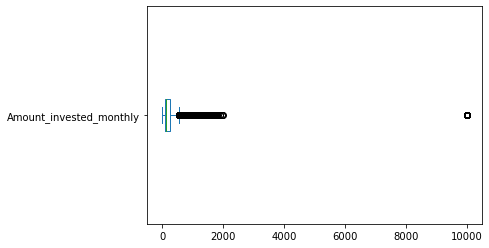

In [206]:
dataset['Amount_invested_monthly'].plot(kind='box', vert=0)
#występują dane które odstają od normy, pozbędziemy się ich

In [207]:
dataset.loc[dataset['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<AxesSubplot:>

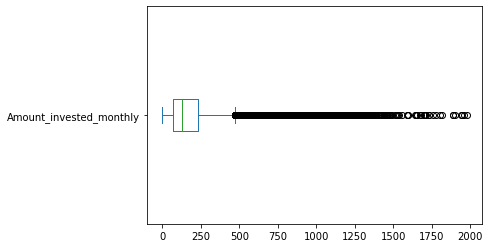

In [208]:
dataset['Amount_invested_monthly'].plot(kind='box', vert=0)


In [209]:
sns.distplot(dataset['Amount_invested_monthly']);

NameError: name 'sns' is not defined

In [ ]:
#uzpelniamy grupową modą
dataset['Amount_invested_monthly'] = dataset.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [ ]:
#sprawdzenie danych trreningowych
dataset.info()

## Usuwanie zbędnych kolumn

In [ ]:
colToDel = ['ID', 'Name', 'SSN']
dataset = dataset.drop(columns=colToDel)

## One - hot encoding

In [ ]:
StringToArray = ''
records = dataset['Type_of_Loan'].unique().tolist()
records = [str(x) for x in records]
mainTypes = [x for x in records if not(',' in x)] # Korzystamy z ',' bo tym znakiem są rozdzielane wartości
mainTypes

In [ ]:
for i in mainTypes : 
    dataset[i] = dataset['Type_of_Loan'].str.contains(i)

del dataset['Type_of_Loan']

In [ ]:
dataset

In [ ]:
columns_new = ['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
        , 'Credit-Builder Loan', 'Not Specified', 'No Specified',
       'Debt Consolidation Loan', 'Auto Loan', 'Home Equity Loan',
       'Student Loan', 'Personal Loan', 'Payday Loan', 'Mortgage Loan','Credit_Score']

In [ ]:
dataset = dataset.reindex(columns=columns_new)
dataset